# Double Finite Square Well
The double finite square well is an interesting problem because it shows, in a very rudamentary way, how you can get binding between two atoms simply because they share a particle. The idea is that the overall energy of the system wants to trend to the minimum.

We setup a double square well potential with:
$$
v(x) =\left\{\begin{array}{lrcl} 
0, &  &x&< -a-b/2  \\
-V_0, & -a-b/2 <&x& <-b/2 \\
0, & -b/2 < &x& <b/2 \\
-V_0  & b/2 <&x& < a+b/2  \\
0,& a+b/2 < &x
\end{array}\right.
$$

We follow the now familiar recipe to get the energy levels of a quantum system. In this case, we want to be able to make plots against an additional parameter, $b$, which is the separation between the two wells. 

To setup the Hamiltonian of a double finite square well in such a way that it will have at least one excited state, we need to make sure the wells are deep enough. We can do this by looking at the solutions for the single finite square well, which you find in https://en.wikipedia.org/wiki/Finite_potential_well. The equation for the solutions read:
$$
\tan (z) = \sqrt{(z_0/z)^2 -1} \\
-1/\tan (z) = \sqrt{(z_0/z)^2 -1}
$$
where $z = \frac{a}{\hbar}\sqrt{ 2m(E+V_0) }$, and $z_0 = \frac{a}{\hbar}\sqrt{ 2m V_0 }$, with clearly $z < z_0$ as a condition for solutions. If we want more than one solution, we thus  must have:
$$
z_0 \ge \frac{\pi}{2} \Rightarrow V_0 \ge \frac{\pi^2\hbar^2}{8 m a^2 }
$$

We can find the solutions for the energies of the single square well by solving the equations numerically, using the `scipy.optimize.root_scaler` routine. This routine finds the zero crossings (i.e. roots) of a function one at a time. You need to provide bounds $[a,b]$ to search in, and those bounds must have $f(a)$ and $f(b)$ with opposite sign, so that there is the expectation of a single zero between them.

Running the code below, you can find the (nearly) exact energy levels for a given $z_0$.

In problem of the double finite well, we would like the second binding energy to not be too close to zero. If it _is_ close to zero, then the corresponding wave function gets rather stretched out, and becomes more tricky to deal with. So I choose $z_0 = \pi$ as a better compromise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
import scipy.optimize as opt
# Setup the input values
hbar=1
m=1

for a in [1.,2.]:
    z0 = 4*np.pi /2
    V0 = 10 # (z0*hbar/a)**2 /m/2
    z0 = a/hbar * np.sqrt(2*m*V0)
    # V0 = 2*(np.pi*hbar/a)**2 /m/8 

    epsilon = 0.0001 # Sufficiently small but not zero to avoid devide by zero issues.
    # Setup the two equations that need to be solved. 
    def opt_fun1(z,z0):
        return( np.tan(z) - np.sqrt((z0/z)**2 -1 ))
    def opt_fun2(z,z0):
        return( -1/np.tan(z) - np.sqrt((z0/z)**2 -1 ))

    result = []
    z = []
    Ex = []
    for i in range(2*int(z0/np.pi)+1):
        if i*np.pi/2 < z0:
            if (i%2 == 0):
                result.append(opt.root_scalar(opt_fun1,z0,bracket=[np.pi*i/2+epsilon,min((i+1)*np.pi/2-epsilon,z0)]))
            else:
                result.append(opt.root_scalar(opt_fun2,z0,bracket=[np.pi*i/2+epsilon,min((i+1)*np.pi/2-epsilon,z0)]))
            if not result[i].converged: 
                print(result[i])
                z.append(0)
                Ex.append(0)
            else:
                z.append(result[i].root)
                Ex.append((z[i]*hbar/a)**2 /m/2 - V0)
        else:
            z.append(0)
            Ex.append(0)
    print("Potential strenght = {:7.3f}".format(V0))
    print("Widht of the well  = {:7.37}".format(a))
    print("\n Binding energies are predicted to be:")
    for i in range(len(Ex)):
        if Ex[i]<0:print(" Ex[{:1d}] = {:6.3f}".format(i,Ex[i]))
    print()

Potential strenght =  10.000
Widht of the well  =     1.0

 Binding energies are predicted to be:
 Ex[0] = -9.180
 Ex[1] = -6.779
 Ex[2] = -3.054

Potential strenght =  10.000
Widht of the well  =     2.0

 Binding energies are predicted to be:
 Ex[0] = -9.751
 Ex[1] = -9.005
 Ex[2] = -7.773
 Ex[3] = -6.072
 Ex[4] = -3.941



We can now setup the Hamiltonian for the $V_0$ we found, and solve it for a number of values of $b$. Note that we  need a sizable $x$-axis so that the edge effect do not affect our results too strongly, and we need to make sure that $a+b$ fall well within the $x_max$.

Binding Energy levels for b = 0.000 a: 
E[0] = -9.1810   Ex[0] = -9.7507
E[1] = -6.7818   Ex[1] = -9.0054
E[2] = -3.0596   Ex[2] = -7.7730


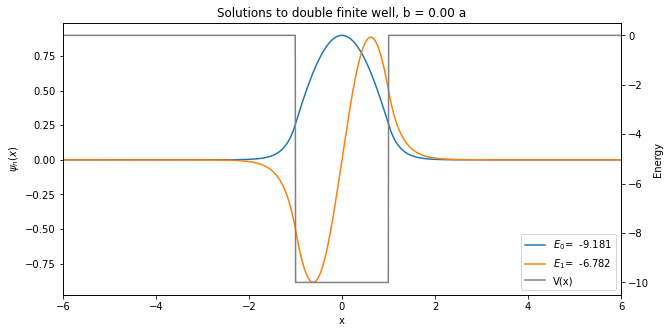

Binding Energy levels for b = 0.200 a: 
E[0] = -8.2835 
E[1] = -7.2157 
E[2] = -2.6886 
E[3] = -0.1959 


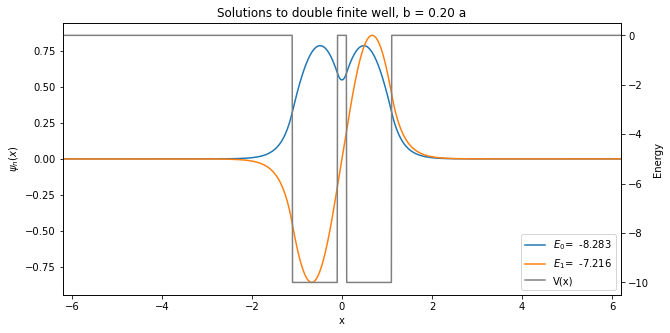

Binding Energy levels for b = 0.400 a: 
E[0] = -7.9538 
E[1] = -7.4712 
E[2] = -2.4349 
E[3] = -0.7979 


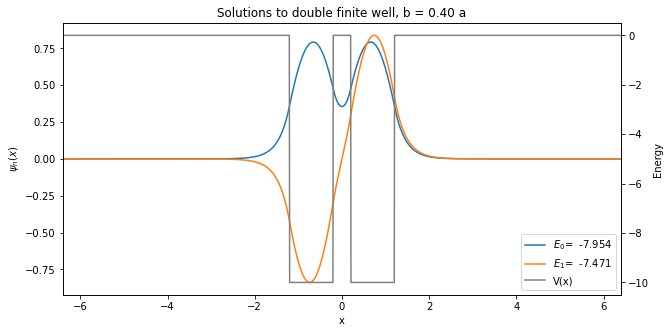

Binding Energy levels for b = 0.600 a: 
E[0] = -7.8231 
E[1] = -7.5917 
E[2] = -2.2725 
E[3] = -1.1842 


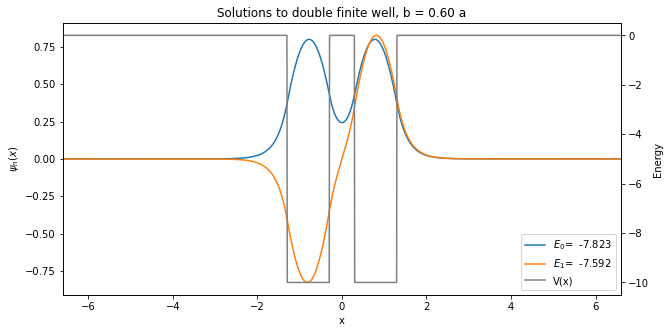

Binding Energy levels for b = 0.800 a: 
E[0] = -7.7588 
E[1] = -7.6546 
E[2] = -2.1491 
E[3] = -1.4423 


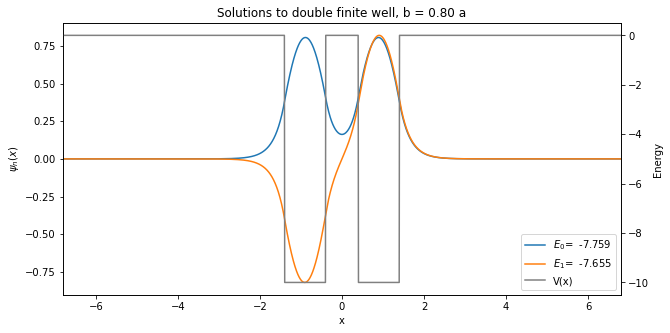

Binding Energy levels for b = 1.000 a: 
E[0] = -7.7302 
E[1] = -7.6832 
E[2] = -2.0631 
E[3] = -1.5982 


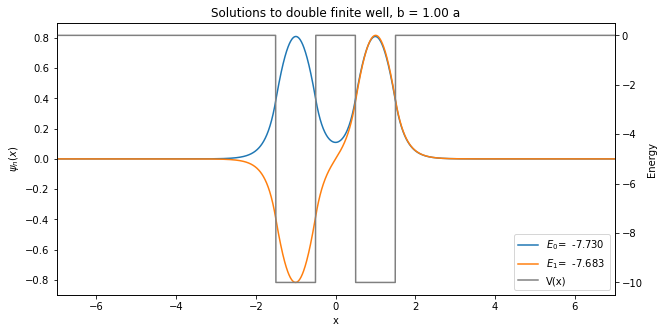

Binding Energy levels for b = 1.200 a: 
E[0] = -7.7173 
E[1] = -7.6961 
E[2] = -2.0030 
E[3] = -1.6943 


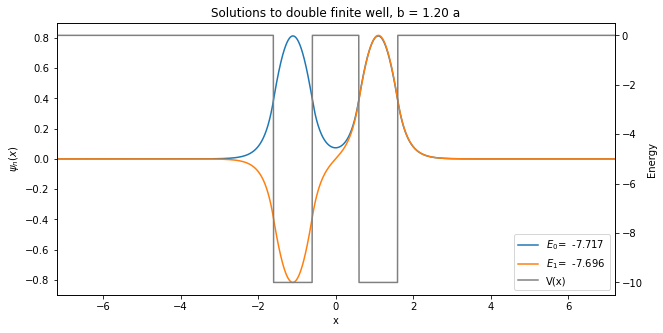

Binding Energy levels for b = 1.400 a: 
E[0] = -7.6877 
E[1] = -7.6779 
E[2] = -1.9012 
E[3] = -1.6878 


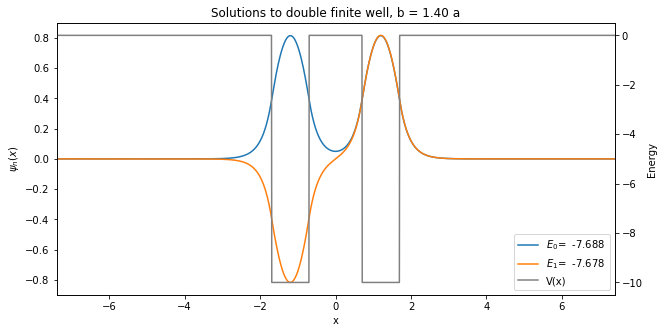

KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 2048
x_max = 8
x_min = -x_max

a=1.
b_vals= np.linspace(0,10,11)*a/5 # 1*a
E_store=[]
Psi_store=[]
for b in b_vals:
    if a+b > x_max/2:
        print("Warning, the a+b is getting too close to the edge!")
    x = np.linspace(x_min,x_max,N)
    # We want to store step size, this is the reliable way:
    h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)

    # V0 = 2*(np.pi*hbar/a)**2 /m/8 

    
    #
    #
    V=np.zeros(N)
    for i in range(N):
        if x[i] > -a -b/2. and x[i]< -b/2.:
            V[i]= -V0
        elif x[i] > b/2. and x[i] < b/2. + a :
            V[i]= -V0

    Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
    H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
    E,psi = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
    E_store.append(E)
    Psi_store.append(psi)
    
    print("Binding Energy levels for b = {:5.3f} a: ".format(b/a))
    for i in range(len(E)):
        if E[i]<0:
            if np.allclose(b,0): 
                print("E[{}] = {:7.4f}   Ex[{}] = {:7.4f}".format(i,E[i],i,Ex[i]))
            else:
                print("E[{}] = {:7.4f} ".format(i,E[i]))
                
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(111)
    ax1.set_xlabel("x")
    ax1.set_ylabel("$\psi_n(x)$")
    for i in range(2):
    #    if E[i]<0:                 # Only plot the bound states. The scattering states are not reliably computed.
            if psi[:,i][N//2+10] < 0:   # Flip the wavefunctions if it is negative at large x, so plots are more consistent.
                ax1.plot(x,-psi[:,i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
            else:
                ax1.plot(x,psi[:,i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))

                plt.title("Solutions to double finite well, b = {:4.2f} a".format(b/a))

    # Plot the potential as well, on a separate y axis
    ax2 = ax1.twinx()
    ax2.set_ylabel("Energy")                            # To get separate energy scale
    ax2.plot(x,V,color="Gray",label="V(x)")
    ax1.set_xlim((-a-b-5,a+b+5))
    legendh1,labels1 = ax1.get_legend_handles_labels()  # For putting all legends in one box.
    legendh2,labels2 = ax2.get_legend_handles_labels()
    plt.legend(legendh1+legendh2,labels1+labels2,loc="lower right")
    plt.savefig("Double_Finite_Square_Well_WaveFunctions_b_{}.pdf".format(10*int(b/a)))
    plt.show()

## Energy levels versus b
Finally, we plot the energy of the ground state and the first excited state versus the separation distance $b$.


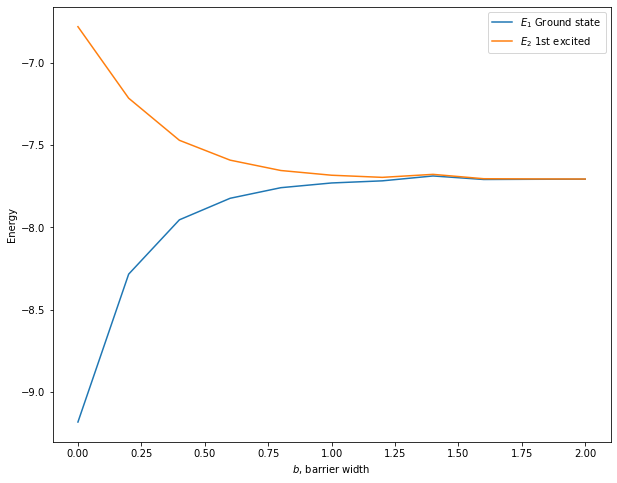

In [3]:
fig = plt.figure(figsize=(10,8))
E_0=[E_store[i][0] for i in range(len(b_vals))]
E_1=[E_store[i][1] for i in range(len(b_vals))]
plt.xlabel("$b$, barrier width")
plt.ylabel("Energy")
plt.plot(b_vals,E_0,label="$E_1$ Ground state")
plt.plot(b_vals,E_1,label="$E_2$ 1st excited")
plt.legend()
plt.savefig("Double_Finite_Well_Energies.pdf")
plt.show()